In [16]:
from utils.plot_utils import plot_returns
from scipy.interpolate import UnivariateSpline
import numpy as np

In [17]:
environment = "cartpole"
n_seeds = 10

# legends = ["Decision Tree, Depth=10", "Random Forest", "Extra Trees", "Support Vectors", "K-Neighbours", "Gaussian Process"]
# legends = ["Decision Tree, Depth=6","Decision Tree, Depth=8","Decision Tree, Depth=10", "Decision Tree, Depth=12", "Decision Tree, Depth=14"]
legends = ["Neural Network"]
markers = ["x","^","+","v","o","*"]

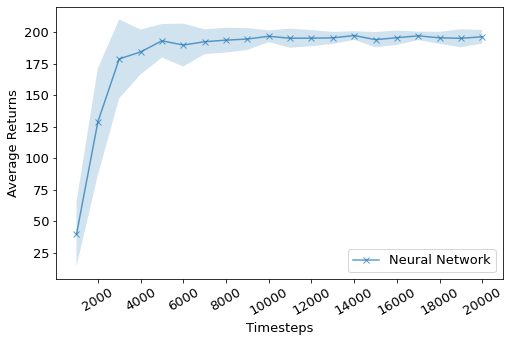

In [5]:
## Evaluation Returns
eval_means = []
eval_lower = []
eval_upper = []
for i in range(len(legends)):
    a = np.genfromtxt(f'{environment}/eval_returns/{environment}_eval_{legends[i]}.csv', delimiter=',')
    eval_means.append(np.mean(a, axis=0))
    eval_lower.append(np.mean(a, axis=0)-np.std(a, axis=0))
    eval_upper.append(np.mean(a, axis=0)+np.std(a, axis=0))

plot_returns(save_name="cartpole_eval_nn", values=eval_means, lower=eval_lower, upper=eval_upper, xlabel="Timesteps", ylabel="Average Returns", legend_names=legends, eval_freq=1000, markers=markers)

[ 12.055  65.105 120.29  151.435 168.765 159.45  173.85  174.575 177.535
 187.835 180.79  183.255 187.225 190.88  183.745 185.915 191.62  187.015
 183.36  186.78 ]
[array([ 18.975,  98.675, 169.825, 179.075, 194.55 , 191.95 , 189.45 ,
       192.825, 194.075, 196.25 , 196.525, 192.7  , 193.15 , 196.525,
       190.85 , 191.125, 195.025, 193.45 , 194.35 , 195.625])]
[array([ 26.75, 135.35, 195.35, 188.95, 199.85, 195.85, 196.6 , 200.  ,
       199.3 , 198.45, 197.9 , 197.95, 195.95, 198.25, 194.85, 198.75,
       197.75, 196.45, 196.25, 197.9 ])]
[array([ 60.3  , 163.35 , 200.   , 198.8  , 200.   , 199.175, 200.   ,
       200.   , 200.   , 200.   , 199.375, 200.   , 200.   , 200.   ,
       199.275, 200.   , 200.   , 199.225, 200.   , 199.825])]


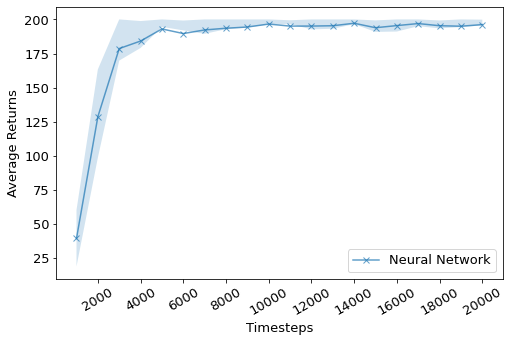

In [18]:
## Evaluation Returns Robust
eval_medians = []
eval_lower = []
eval_upper = []
eval_cvar = []
for i in range(len(legends)):
    a = np.genfromtxt(f'{environment}/eval_returns/{environment}_eval_{legends[i]}.csv', delimiter=',')
    cvar, q1, median, q3 = np.percentile(a, [5, 25, 50, 75], axis=0)
    eval_medians.append(median)
    eval_lower.append(q1)
    eval_upper.append(q3)
    eval_cvar.append(cvar)

print(cvar)
plot_returns(save_name="cartpole_eval_nn", values=eval_means, lower=eval_lower, upper=eval_upper, xlabel="Timesteps", ylabel="Average Returns", legend_names=legends, eval_freq=1000, markers=markers)

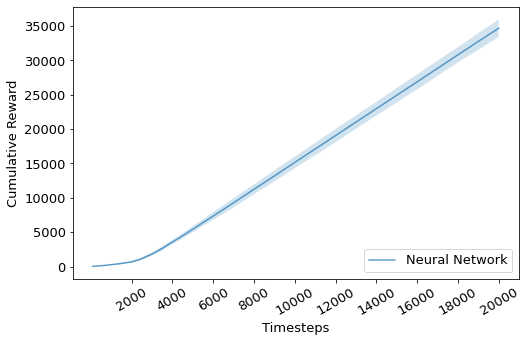

In [21]:
## Train Returns
train_means = []
train_lower = []
train_upper = []
points = []
xs = np.linspace(100, 20000, 200)

for i in range(len(legends)):
    a = np.genfromtxt(f'{environment}/train_returns/{environment}_train_{legends[i]}.csv', delimiter=',')
    
    for j in range(0, n_seeds*2, 2):
        x = [t for t in a[j+1] if np.isnan(t) == False]
        y = [r for r in a[j] if np.isnan(r) == False]
        spline = UnivariateSpline(x, y)
        # points.append(spline(xs))
        points.append(np.cumsum(spline(xs)))

    train_means.append(np.mean(points,axis=0))
    train_lower.append(np.mean(points, axis=0)-np.std(points, axis=0))
    train_upper.append(np.mean(points, axis=0)+np.std(points, axis=0))

plot_returns(save_name="cartpole_train_nn", values=train_means, lower=train_lower, upper=train_upper, xlabel="Timesteps", ylabel="Cumulative Reward", legend_names=legends, eval_freq=100, markers=None)

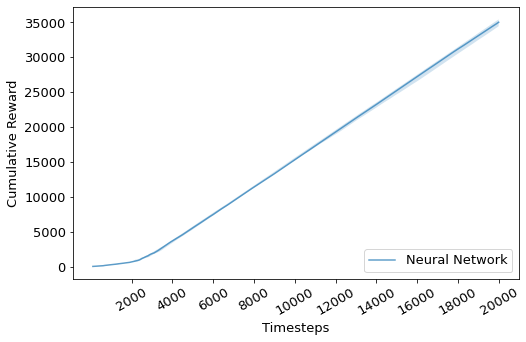

In [19]:
## Train Returns Robust
train_medians = []
train_lower = []
train_upper = []
train_cvar = []
points = []
xs = np.linspace(100, 20000, 200)

for i in range(len(legends)):
    a = np.genfromtxt(f'{environment}/train_returns/{environment}_train_{legends[i]}.csv', delimiter=',')
    
    for j in range(0, n_seeds*2, 2):
        x = [t for t in a[j+1] if np.isnan(t) == False]
        y = [r for r in a[j] if np.isnan(r) == False]
        spline = UnivariateSpline(x, y)
        # points.append(spline(xs))
        points.append(np.cumsum(spline(xs)))

    cvar, q1, median, q3 = np.percentile(points, [5, 25, 50, 75], axis=0)
    train_medians.append(median)
    train_lower.append(q1)
    train_upper.append(q3)
    train_cvar.append(cvar)

plot_returns(save_name="cartpole_train_nn", values=train_medians, lower=train_lower, upper=train_upper, xlabel="Timesteps", ylabel="Cumulative Reward", legend_names=legends, eval_freq=100, markers=None)